In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv
from channel_ID import CHANNEL_ID



In [10]:
## load enviroment variables from the .env files
load_dotenv()

True

In [11]:
## get the api key from the .env file
api_key = os.getenv("api_key")

In [12]:
## create a youtube api client
youtube = build('youtube', 'v3', developerKey=api_key)

In [13]:
## function to fetch the channel data for a given channel id and youtube api key

def channel_data(api_key, channel_id):
    all_data = []

    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics',
        id = ','.join(channel_id)
    )
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(channel_title = response['items'][i]['snippet']['title'],
                    created_date = response['items'][i]['snippet']['publishedAt'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    total_videos = response['items'][i]['statistics']['videoCount'],
                    total_views = response['items'][i]['statistics']['viewCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        
        all_data.append(data)

    return all_data

In [14]:
## Calling the function to get the channel data and store it in a variable

channel_stat = channel_data(api_key,CHANNEL_ID)

channel_stat


[{'channel_title': 'Joma Tech',
  'created_date': '2016-08-31T22:22:07Z',
  'subscribers': '2330000',
  'total_videos': '88',
  'total_views': '186451452',
  'playlist_id': 'UUV0qA-eDDICsRR9rPcnG7tw'},
 {'channel_title': 'StatQuest with Josh Starmer',
  'created_date': '2011-05-24T01:52:48Z',
  'subscribers': '1320000',
  'total_videos': '285',
  'total_views': '73728802',
  'playlist_id': 'UUtYLUTtgS3k1Fg4y5tAhLbw'},
 {'channel_title': 'edureka!',
  'created_date': '2012-06-29T06:12:26Z',
  'subscribers': '4320000',
  'total_videos': '11550',
  'total_views': '442327827',
  'playlist_id': 'UUkw4JCwteGrDHIsyIIKo4tQ'},
 {'channel_title': 'sentdex',
  'created_date': '2012-12-16T20:49:11Z',
  'subscribers': '1380000',
  'total_videos': '1255',
  'total_views': '116668473',
  'playlist_id': 'UUfzlCWGWYyIQ0aLC5w48gBQ'},
 {'channel_title': 'Data Professor',
  'created_date': '2019-08-17T15:59:56Z',
  'subscribers': '198000',
  'total_videos': '353',
  'total_views': '7068096',
  'playlist_i

In [15]:
## Coverting the channel data to a pandas dataframe

channel_stat_df = pd.DataFrame(channel_stat)

In [16]:
## checking the first five rows of the datafrmae
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Joma Tech,2016-08-31T22:22:07Z,2330000,88,186451452,UUV0qA-eDDICsRR9rPcnG7tw
1,StatQuest with Josh Starmer,2011-05-24T01:52:48Z,1320000,285,73728802,UUtYLUTtgS3k1Fg4y5tAhLbw
2,edureka!,2012-06-29T06:12:26Z,4320000,11550,442327827,UUkw4JCwteGrDHIsyIIKo4tQ
3,sentdex,2012-12-16T20:49:11Z,1380000,1255,116668473,UUfzlCWGWYyIQ0aLC5w48gBQ
4,Data Professor,2019-08-17T15:59:56Z,198000,353,7068096,UUV8e2g4IWQqK71bbzGDEI4Q


In [19]:
## checking the infomations of the columns

channel_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_title  15 non-null     object
 1   created_date   15 non-null     object
 2   subscribers    15 non-null     object
 3   total_videos   15 non-null     object
 4   total_views    15 non-null     object
 5   playlist_id    15 non-null     object
dtypes: object(6)
memory usage: 848.0+ bytes


In [21]:
channel_stat_df['created_date'].head()

0    2016-08-31T22:22:07Z
1    2011-05-24T01:52:48Z
2    2012-06-29T06:12:26Z
3    2012-12-16T20:49:11Z
4    2019-08-17T15:59:56Z
Name: created_date, dtype: object

In [ ]:
## changing the date column to datetime format

## Dates are in ISO8601 format (like "2022-09-14T07:54:45.021008Z")
## "2022-09-14T07:54:45.021008Z" includes fractional seconds (.021008) and a "Z" to indicate UTC.

channel_stat_df['created_date'] = pd.to_datetime(channel_stat_df['created_date'], format='ISO8601').dt.date

In [23]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Joma Tech,2016-08-31,2330000,88,186451452,UUV0qA-eDDICsRR9rPcnG7tw
1,StatQuest with Josh Starmer,2011-05-24,1320000,285,73728802,UUtYLUTtgS3k1Fg4y5tAhLbw
2,edureka!,2012-06-29,4320000,11550,442327827,UUkw4JCwteGrDHIsyIIKo4tQ
3,sentdex,2012-12-16,1380000,1255,116668473,UUfzlCWGWYyIQ0aLC5w48gBQ
4,Data Professor,2019-08-17,198000,353,7068096,UUV8e2g4IWQqK71bbzGDEI4Q


In [24]:
## Converting the subscriber, total_videos and total_views columns to integer data type

channel_stat_df['subscribers'] = channel_stat_df['subscribers'].astype(int)
channel_stat_df['total_videos'] = channel_stat_df['total_videos'].astype(int)
channel_stat_df['total_views'] = channel_stat_df['total_views'].astype(int)

In [25]:
## Creating a new column year to store the year of the channel creation 

channel_stat_df['year'] = pd.to_datetime(channel_stat_df['created_date']).dt.year

In [27]:
numerical_data = channel_stat_df[['subscribers','total_videos','total_views','year']]

correlation = numerical_data.corr()
correlation

,subscribers,total_videos,total_views,year
subscribers,1.000000,0.437012,0.969071,-0.035254
total_videos,0.437012,1.000000,0.427335,-0.258230
total_views,0.969071,0.427335,1.000000,0.032594
year,-0.035254,-0.258230,0.032594,1.000000


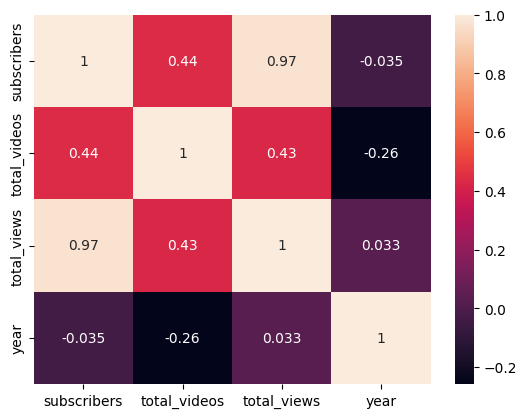

In [28]:
sns.heatmap(correlation, annot=True)
plt.show()

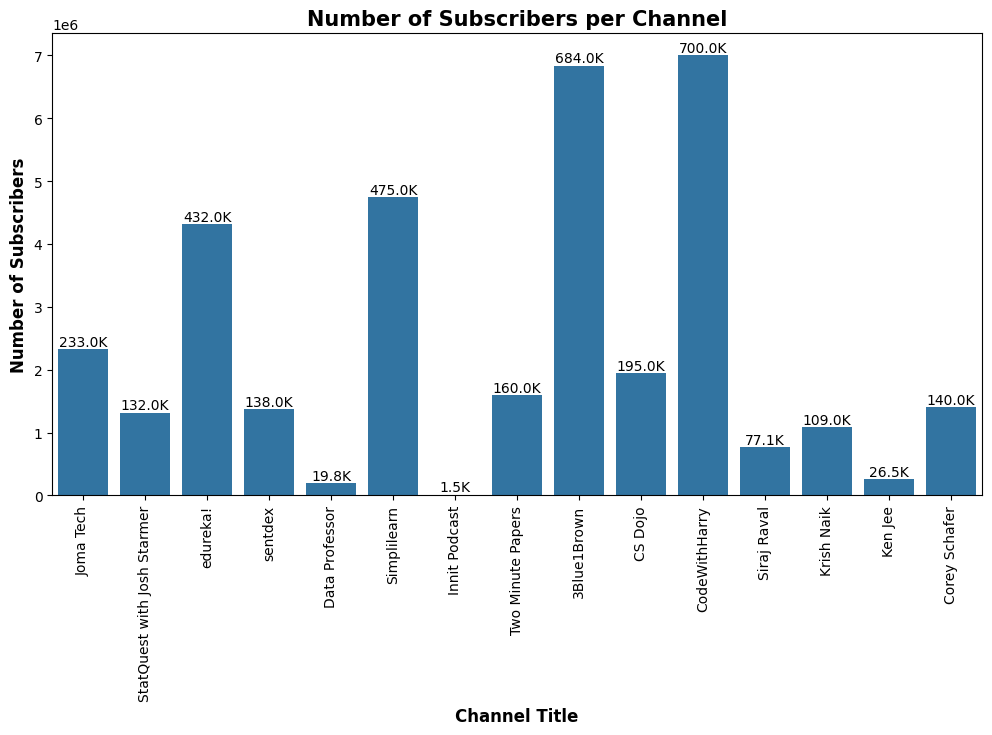

In [54]:
## number of subecribers per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='subscribers', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 10000:.1f}K'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Subscribers per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Subscribers', fontsize=12, fontweight='bold')
plt.show()

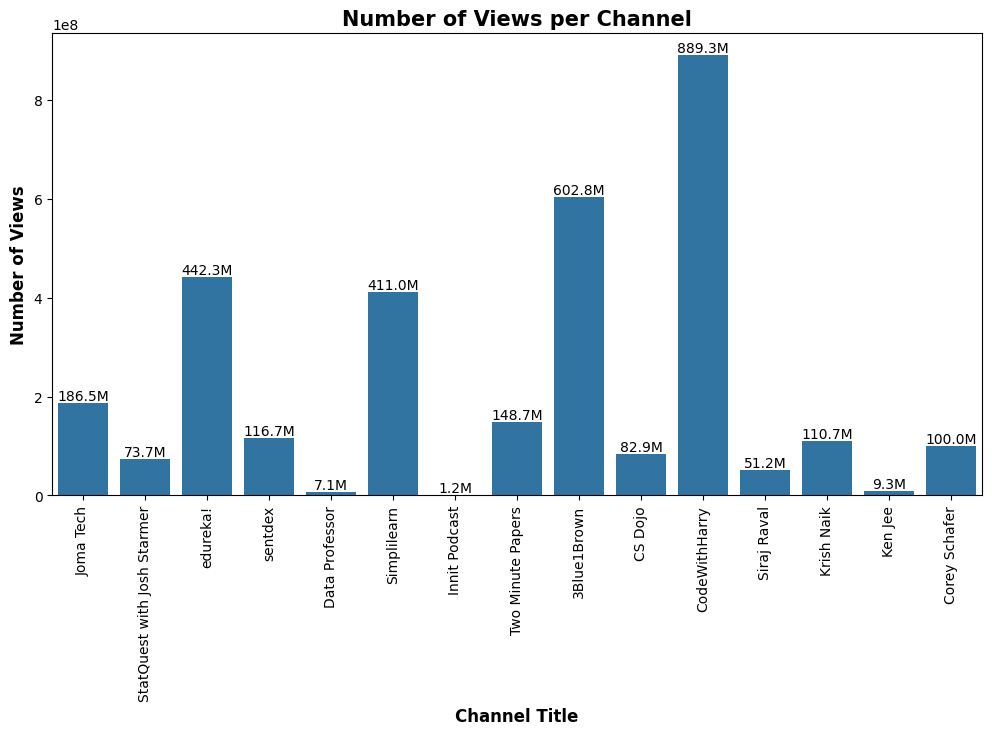

In [55]:
 ## Number of views per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_views', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 1000000:.1f}M'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Views per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Views', fontsize=12, fontweight='bold')
plt.show()

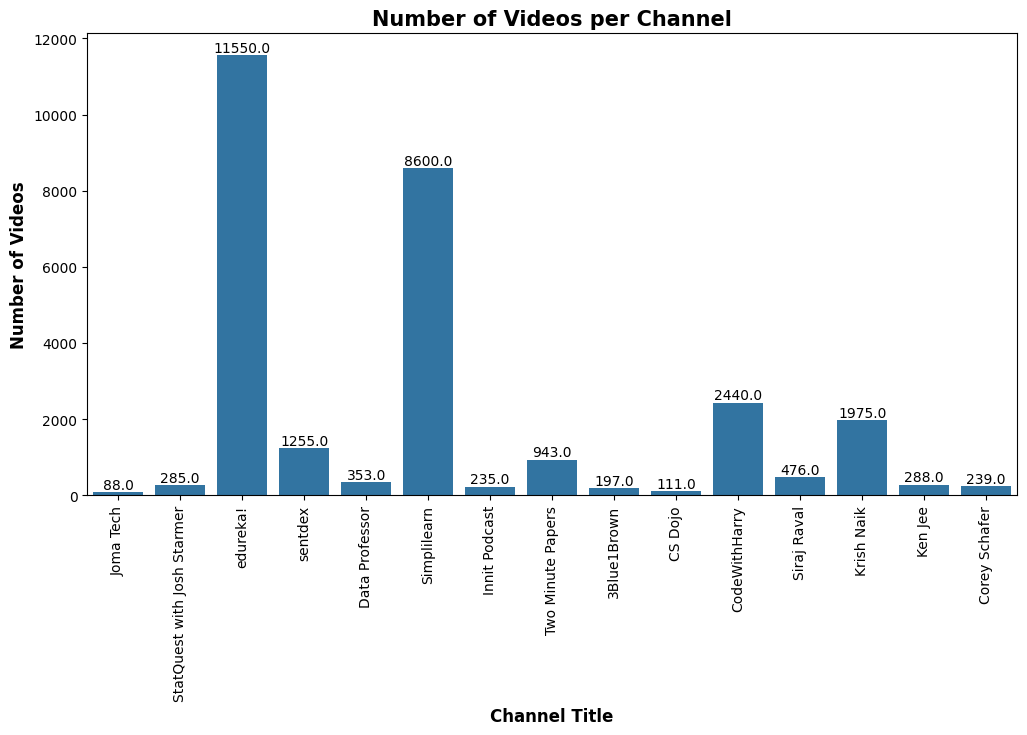

In [56]:
## number of videos per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_videos', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height()}'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Videos per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Videos', fontsize=12, fontweight='bold')  
plt.show()  
